In [3]:
import streamlit as st
from datetime import datetime
import yfinance as yf
from plotly import graph_objs as go
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np
%matplotlib inline

In [4]:


START = "2015-01-01"
TODAY = datetime.today().strftime("%Y-%m-%d")

# download returns a DataFrame with Date as DatetimeIndex
df = yf.download("AAPL", start=START, end=TODAY)


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [5]:
df = df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-01-02,24.261049,24.729272,23.821673,24.718176,212818400
1,2015-01-05,23.577572,24.110148,23.391171,24.030261,257142000
2,2015-01-06,23.579796,23.839426,23.218087,23.641929,263188400
3,2015-01-07,23.910437,24.010294,23.677434,23.788387,160423600
4,2015-01-08,24.829126,24.886823,24.121244,24.238856,237458000


In [6]:
df = df.drop(["Date"], axis=1)

C:\Users\lydia\AppData\Local\Temp\ipykernel_7212\2049818429.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(["Date"], axis=1)


In [7]:
plt.plot(df.Close, label='Closing Price')

In [8]:
ma100 = df.Close.rolling(100).mean()

ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2687,211.319953
2688,211.655263
2689,212.069079
2690,212.443556


In [9]:
plt.figure(figsize=(12,6))
plt.plot(df.Close, label='Closing Price')
plt.plot(ma100, 'r', label='MA100')

In [10]:
ma200 = df.Close.rolling(200).mean()

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df.Close, label='Closing Price')
plt.plot(ma100, 'r', label='MA100')
plt.plot(ma200, 'g', label='MA200')

In [12]:
df.dropna(inplace=True)

In [13]:
#splitting data into training and testing
data_train = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_test = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])
print(data_train.shape)
print(data_test.shape)

(1884, 1)
(808, 1)


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


scaler = MinMaxScaler(feature_range=(0,1))

In [15]:

data_train_array = scaler.fit_transform(data_train)
data_train_array

array([[0.02304538],
       [0.01871462],
       [0.01872871],
       ...,
       [0.73063672],
       [0.75175386],
       [0.75175386]])

In [16]:
x_train = []
y_train = []
for i in range(100, data_train_array.shape[0]):
    x_train.append(data_train_array[i-100:i])
    y_train.append(data_train_array[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)


In [17]:
x_train.shape

(1784, 100, 1)

In [18]:
# importing libraries for model building

In [20]:
from keras.layers import Dense, Dropout, LSTM, Input
from keras.models import Sequential

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:

model = Sequential()
model.add(Input(shape=(x_train.shape[1], 1)))                     # changed: Input instead of input_shape in LSTM
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(120, activation='relu', return_sequences=False))   # changed: return_sequences=False on final LSTM
model.add(Dropout(0.5))
model.add(Dense(1))
# ...existing code...

In [ ]:
# model = Sequential()

# model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
# model.add(Dropout(0.2))
# model.add(LSTM(units=60, activation='relu', return_sequences=True))
# model.add(Dropout(0.3))
# model.add(LSTM(units=80, activation='relu', return_sequences=True))
# model.add(Dropout(0.4))
# model.add(LSTM(units=120, activation='relu', return_sequences=True))
# model.add(Dropout(0.5))
# model.add(Dense(units=1)) #output layer

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 0.0326
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 0.0063
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 0.0062
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 0.0064
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 0.0056
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 0.0046
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 0.0048
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 0.0040
Epoch 9/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 0.0037
Epoch 10/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 0.0042
Epoch 11/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 0.0038
Epoch 12/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 0.0036
Epoch 13/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 0.0044
Epoch 14/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 0.0035
Epoch 15/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 0.0034
Epoc

In [ ]:
model.save('keras_model.keras')

In [ ]:
past_100_days = data_train.tail(100)

In [ ]:

final_df = pd.concat([past_100_days, data_test], ignore_index=True)

In [ ]:
final_df.head()

Ticker,AAPL
0,172.394058
1,169.511673
2,169.227005
3,168.510406
4,171.622238


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[3.64277197e-01],
       [3.42898069e-01],
       [3.40786640e-01],
       [3.35471510e-01],
       [3.58552480e-01],
       [3.69109854e-01],
       [3.38820643e-01],
       [3.13482358e-01],
       [3.15230150e-01],
       [3.43698909e-01],
       [3.41951684e-01],
       [3.15230150e-01],
       [3.03725938e-01],
       [2.82028444e-01],
       [2.51083599e-01],
       [2.70524232e-01],
       [2.85887325e-01],
       [2.87852983e-01],
       [2.73873478e-01],
       [2.98337923e-01],
       [2.95935289e-01],
       [2.73655159e-01],
       [2.45477038e-01],
       [2.31934509e-01],
       [2.72053139e-01],
       [2.39798158e-01],
       [2.12202785e-01],
       [1.82277778e-01],
       [2.14824077e-01],
       [2.47588694e-01],
       [2.55088139e-01],
       [2.79552358e-01],
       [2.89746433e-01],
       [3.14793061e-01],
       [3.24913911e-01],
       [3.53018806e-01],
       [3.57751640e-01],
       [3.64159041e-01],
       [3.88623146e-01],
       [3.79958544e-01],


In [ ]:
input_data.shape

(908, 1)

In [ ]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape) 

(808, 100, 1)
(808,)


In [ ]:
#MAKING PREDICTIONS
y_predicted = model.predict(x_test)

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


In [ ]:
scaler.scale_

array([0.00741717])

In [ ]:
scaler_factor = 1/scaler.scale_[0]
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

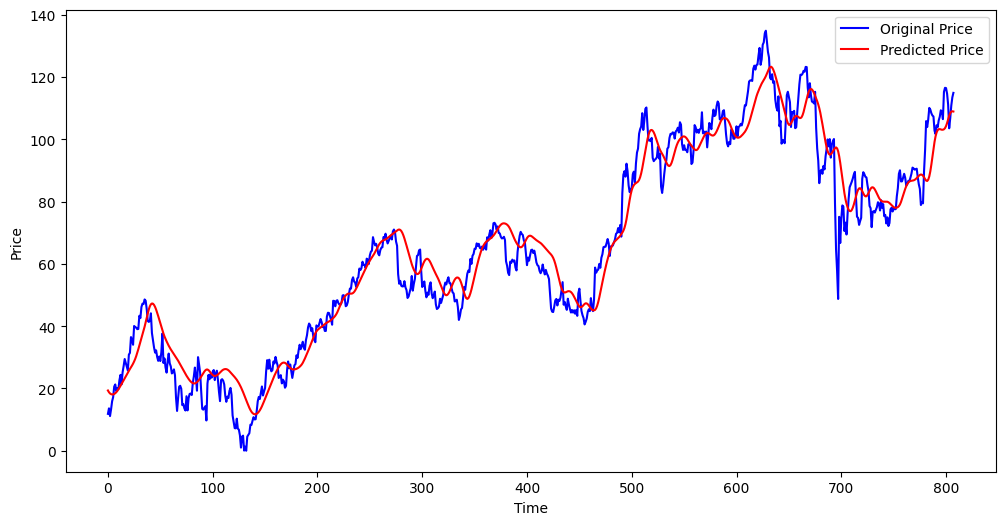

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()